<a href="https://colab.research.google.com/github/Rohit-Nikam/Machine_Learning-CAP-5610-/blob/master/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras import regularizers
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


### **First Architecture**

x_train shape: (50000, 32, 32, 3)
Train samples : 50000
Test samples : 10000
Epoch 1/10
625/625 [==============================] - 28s 45ms/step - loss: 4.7676 - acc: 0.2377 - val_loss: 3.5607 - val_acc: 0.1966
Epoch 2/10
625/625 [==============================] - 27s 43ms/step - loss: 2.7473 - acc: 0.3159 - val_loss: 2.7836 - val_acc: 0.1891
Epoch 3/10
625/625 [==============================] - 27s 44ms/step - loss: 2.1916 - acc: 0.3587 - val_loss: 2.5332 - val_acc: 0.1585
Epoch 4/10
625/625 [==============================] - 27s 43ms/step - loss: 1.9538 - acc: 0.3807 - val_loss: 2.4391 - val_acc: 0.1821
Epoch 5/10
625/625 [==============================] - 27s 43ms/step - loss: 1.8338 - acc: 0.3972 - val_loss: 2.4041 - val_acc: 0.1526
Epoch 6/10
625/625 [==============================] - 27s 43ms/step - loss: 1.7548 - acc: 0.4065 - val_loss: 2.3512 - val_acc: 0.1978
Epoch 7/10
625/625 [==============================] - 27s 44ms/step - loss: 1.6990 - acc: 0.4210 - val_loss: 2.3897 - v

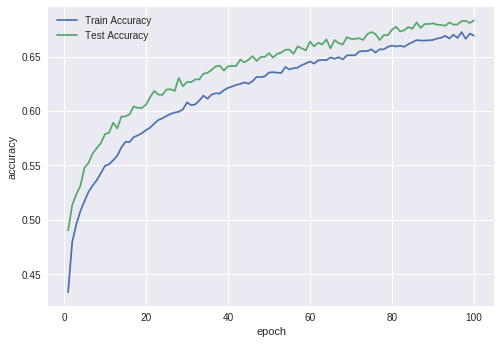

validation loss: 0.9809907541275025
validation accuracy: 0.6834


In [0]:
batch_size = 64
num_classes = 10
epochs = 100
epochs1 = 10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('x_train shape:', X_train.shape)
print('Train samples :',X_train.shape[0])
print('Test samples :',X_test.shape[0])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255  ## normalizing the data set
X_test /= 255

X_train = list(X_train)
y_train = list(y_train)

val_loss = []
val_acc = []

## considering first 40k dataset as training and last 10k as validation set
X_val = np.array(X_train[40000:])   
y_val = np.array(y_train[40000:])
  
X_train_ = np.array(X_train[0:40000])
y_train_ = np.array(y_train[0:40000])
  
  
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(64,(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-4),metrics=['accuracy'])


datagen = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        zca_whitening=False,
        fill_mode='nearest')

datagen.fit(X_train_)

model.fit_generator(datagen.flow(X_train_, y_train_, batch_size=64),validation_data=(X_val, y_val),steps_per_epoch=len(X_train_) / 64, epochs=epochs1)


History = model.fit(X_train_, y_train_,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_val, y_val))
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(History.history)

plotaccuracy = plt.plot(range(1,epochs+1),History.history['acc'],range(1,epochs+1),History.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

print('validation loss:',History.history['val_loss'][-1])
print('validation accuracy:',History.history['val_acc'][-1])

## **Second Architecture**

x_train shape: (50000, 32, 32, 3)
Train samples : 50000
Test samples : 10000
Epoch 1/10
1250/1250 [==============================] - 47s 38ms/step - loss: 2.9215 - acc: 0.3387 - val_loss: 2.3090 - val_acc: 0.1804
Epoch 2/10
1250/1250 [==============================] - 44s 35ms/step - loss: 1.7431 - acc: 0.4252 - val_loss: 2.7084 - val_acc: 0.1716
Epoch 3/10
1250/1250 [==============================] - 44s 35ms/step - loss: 1.6455 - acc: 0.4616 - val_loss: 2.6986 - val_acc: 0.1876
Epoch 4/10
1250/1250 [==============================] - 44s 35ms/step - loss: 1.5804 - acc: 0.4879 - val_loss: 3.1149 - val_acc: 0.1961
Epoch 5/10
1250/1250 [==============================] - 44s 35ms/step - loss: 1.5317 - acc: 0.5137 - val_loss: 2.7588 - val_acc: 0.1856
Epoch 6/10
1250/1250 [==============================] - 45s 36ms/step - loss: 1.4900 - acc: 0.5280 - val_loss: 2.6428 - val_acc: 0.2377
Epoch 7/10
1250/1250 [==============================] - 45s 36ms/step - loss: 1.4533 - acc: 0.5453 - val_lo

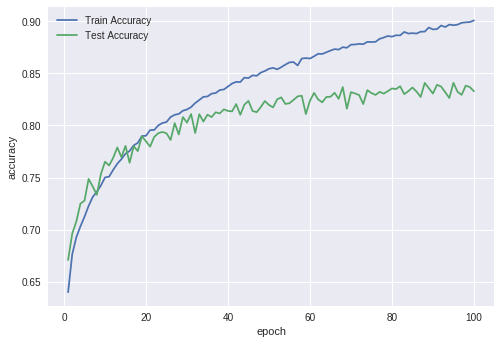

validation loss: 0.6712169784545898
validation accuracy: 0.8329


In [0]:
batch_size = 32
num_classes = 10
epochs = 100
epochs1 = 10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('x_train shape:', X_train.shape)
print('Train samples :',X_train.shape[0])
print('Test samples :',X_test.shape[0])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train = list(X_train)
y_train = list(y_train)

val_loss = []
val_acc = []

X_val = np.array(X_train[40000:])
y_val = np.array(y_train[40000:])
  
X_train = np.array(X_train[0:40000])
y_train = np.array(y_train[0:40000])
  
  
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu',padding='same',input_shape=X_train_.shape[1:]))
model.add(Conv2D(64,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
learning_rate = 0.0001
opt_rms = keras.optimizers.rmsprop(lr=learning_rate,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

datagen = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        zca_whitening=False,
        fill_mode='nearest')

datagen.fit(X_train_)

model.fit_generator(datagen.flow(X_train_, y_train_, batch_size=32),validation_data=(X_val, y_val),steps_per_epoch=len(X_train_) // 32, epochs=epochs1)


History = model.fit(X_train_, y_train_,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_val, y_val))
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(History.history)

plotaccuracy = plt.plot(range(1,epochs+1),History.history['acc'],range(1,epochs+1),History.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

print('validation loss:',History.history['val_loss'][-1])
print('validation accuracy:',History.history['val_acc'][-1])

## **Third Architecture**

x_train shape: (50000, 32, 32, 3)
Train samples : 50000
Test samples : 10000
Epoch 1/10
1250/1250 [==============================] - 56s 45ms/step - loss: 5.0852 - acc: 0.2902
Epoch 2/10
1250/1250 [==============================] - 55s 44ms/step - loss: 1.8926 - acc: 0.3990
Epoch 3/10
1250/1250 [==============================] - 55s 44ms/step - loss: 1.6339 - acc: 0.4437
Epoch 4/10
1250/1250 [==============================] - 55s 44ms/step - loss: 1.5447 - acc: 0.4701
Epoch 5/10
1250/1250 [==============================] - 55s 44ms/step - loss: 1.4841 - acc: 0.4927
Epoch 6/10
1250/1250 [==============================] - 55s 44ms/step - loss: 1.4441 - acc: 0.5082
Epoch 7/10
1250/1250 [==============================] - 55s 44ms/step - loss: 1.4066 - acc: 0.5218
Epoch 8/10
1250/1250 [==============================] - 55s 44ms/step - loss: 1.3720 - acc: 0.5361
Epoch 9/10
1250/1250 [==============================] - 54s 43ms/step - loss: 1.3396 - acc: 0.5509
Epoch 10/10
1250/1250 [=========

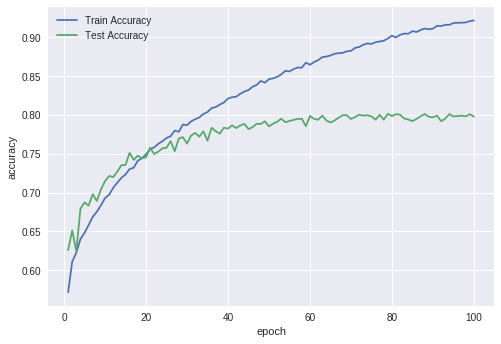

validation loss: 0.7819925700187683
validation accuracy: 0.7978


In [0]:
batch_size = 32
num_classes = 10
epochs = 100
epochs1 = 10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('x_train shape:', X_train.shape)
print('Train samples :',X_train.shape[0])
print('Test samples :',X_test.shape[0])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train = list(X_train)
y_train = list(y_train)

val_loss = []
val_acc = []

X_val = np.array(X_train[40000:])
y_val = np.array(y_train[40000:])
  
X_train_ = np.array(X_train[0:40000])
y_train_ = np.array(y_train[0:40000])
  
  
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu',padding='same',input_shape=X_train_.shape[1:])
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Conv2D(256,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.20))
model.add(Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
learning_rate = 0.0001
opt = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])


datagen = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        zca_whitening=False,
        fill_mode='nearest')

datagen.fit(X_train_)

model.fit_generator(datagen.flow(X_train_, y_train_, batch_size=64),steps_per_epoch=len(X_train_) / 32, epochs=epochs1)


History = model.fit(X_train_, y_train_,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_val, y_val))
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(History.history)

plotaccuracy = plt.plot(range(1,epochs+1),History.history['acc'],range(1,epochs+1),History.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

print('validation loss:',History.history['val_loss'][-1])
print('validation accuracy:',History.history['val_acc'][-1])

## **Fourth Architecture**  (best architecture)

x_train shape: (50000, 32, 32, 3)
Train samples : 50000
Test samples : 10000
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
625/625 [==============================] - 40s 64ms/step - loss: 2.7086 - acc: 0.2558 - val_loss: 2.7588 - val_acc: 0.1720
Epoch 2/10
625/625 [==============================] - 37s 59ms/step - loss: 2.0274 - acc: 0.3525 - val_loss: 2.5419 - val_acc: 0.1821
Epoch 3/10
625/625 [==============================] - 36s 58ms/step - loss: 1.8477 - acc: 0.4027 - val_loss: 2.7202 - val_acc: 0.1713
Epoch 4/10
625/625 [==============================] - 35s 56ms/step - loss: 1.7277 - acc: 0.4343 - val_loss: 3.0152 - val_acc: 0.1513
Epoch 5/10
625/625 [==============================] - 36s 57ms/step - loss: 1.6298 - acc: 0.4664 - val_loss: 2.8013 - val_acc: 0.2153
Epoch 6/10
625/625

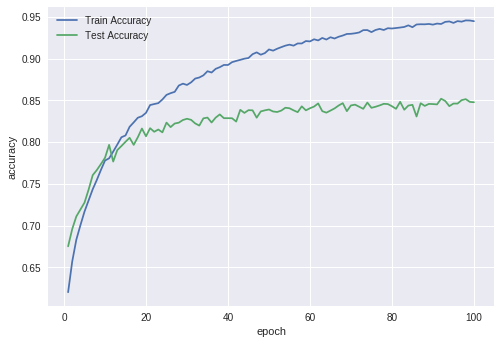

validation loss: 0.6236426913261414
validation accuracy: 0.8478


In [2]:
batch_size = 32
num_classes = 10
epochs = 100
epochs1 = 10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('x_train shape:', X_train.shape)
print('Train samples :',X_train.shape[0])
print('Test samples :',X_test.shape[0])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train = list(X_train)
y_train = list(y_train)

val_loss = []
val_acc = []

X_val = np.array(X_train[40000:])
y_val = np.array(y_train[40000:])
  
X_train_ = np.array(X_train[0:40000])
y_train_ = np.array(y_train[0:40000])
  
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=X_train_.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
 
  

learning_rate = 0.0001
opt_rms = keras.optimizers.rmsprop(lr=learning_rate,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

                   
datagen = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        zca_whitening=False,
        fill_mode='nearest')

datagen.fit(X_train_)

model.fit_generator(datagen.flow(X_train_, y_train_, batch_size=64),validation_data=(X_val, y_val),steps_per_epoch=len(X_train_) / 64, epochs=epochs1)


History = model.fit(X_train_, y_train_,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_val, y_val))
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(History.history)

plotaccuracy = plt.plot(range(1,epochs+1),History.history['acc'],range(1,epochs+1),History.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

print('validation loss:',History.history['val_loss'][-1])
print('validation accuracy:',History.history['val_acc'][-1])